In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


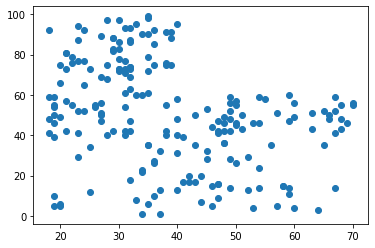

In [12]:
plt.scatter(df['Age'], df['Spending_Score'])

In [14]:
X = df.iloc[:, [2,4]].values

In [15]:
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [19]:
from sklearn.cluster import KMeans
elbows = []
for i in range (1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(X)
    elbows.append(kmeans.inertia_)

C:\Users\kawba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


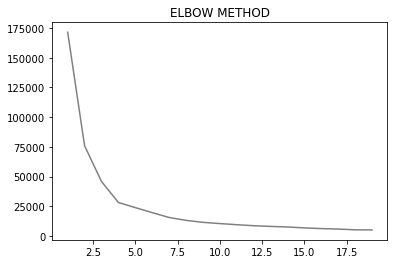

In [24]:
sns.lineplot(range(1,20), elbows, color = 'grey')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()

Elbow is at 5

In [25]:
model = KMeans(n_clusters = 5, init= 'k-means++', random_state = 101)
model.fit(X)

KMeans(n_clusters=5, random_state=101)

In [26]:
y_pred = model.fit_predict(X)

In [28]:
y_pred

array([0, 4, 3, 4, 0, 4, 3, 4, 2, 4, 2, 4, 2, 4, 3, 4, 0, 0, 2, 4, 0, 4,
       2, 4, 2, 4, 2, 0, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3, 4, 1, 4, 1, 0,
       2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 4, 3, 4, 1, 4, 2, 4, 2, 4,
       0, 4, 3, 4, 2, 4, 3, 4, 2, 4, 0, 4, 3, 4, 1, 4, 3, 4, 2, 4, 2, 4,
       2, 4, 3, 4, 3, 4, 1, 4, 3, 4, 2, 4, 2, 4, 3, 0, 3, 4, 3, 4, 2, 4,
       2, 4, 2, 4, 3, 4, 2, 4, 1, 4, 2, 4, 3, 4, 3, 4, 3, 4, 2, 4, 2, 4,
       3, 4])

In [30]:
new_df = df.copy()
new_df['clusters'] = y_pred
new_df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,2
197,198,Male,32,126,74,4
198,199,Male,32,137,18,3


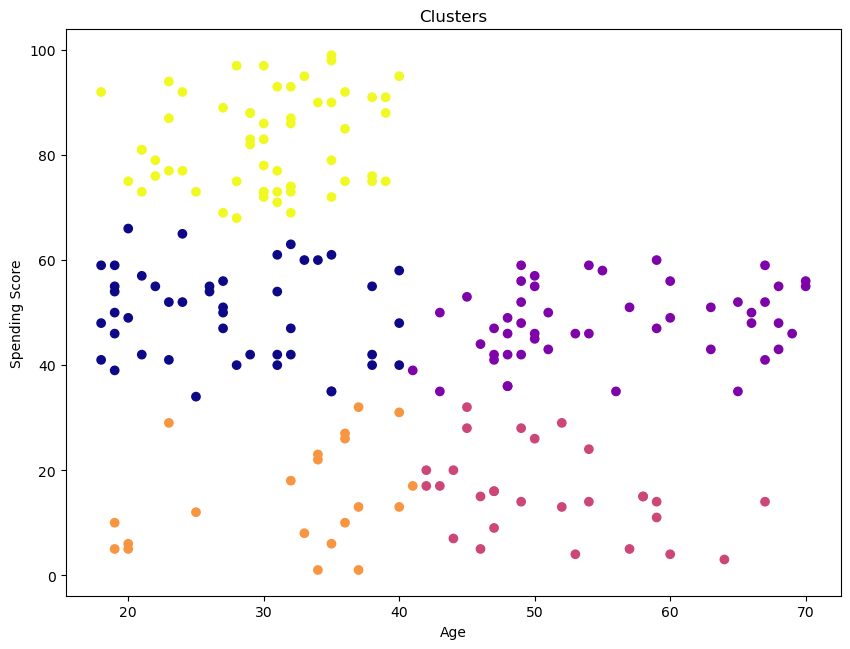

In [33]:
plt.scatter(new_df['Age'], new_df['Spending_Score'], c= new_df['clusters'], cmap = 'plasma')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Clusters')
plt.show()

##### Implementing KNN with other columns

In [34]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
X2 = df.iloc[:, [3,4]]
X2

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [42]:
df = df.rename(columns = {'Annual_Income_(k$)':'Annual_income'})
df

,CustomerID,Genre,Age,Annual_income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


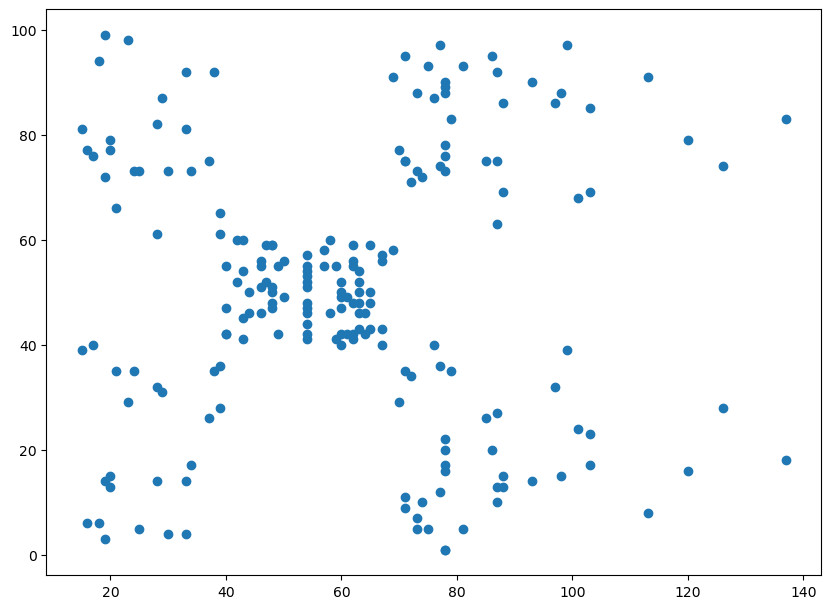

In [44]:
plt.scatter(df['Annual_income'], df['Spending_Score'])

In [48]:
elbow = []
for i in range (1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(X2)
    elbow.append(kmeans.inertia_)

C:\Users\kawba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\kawba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

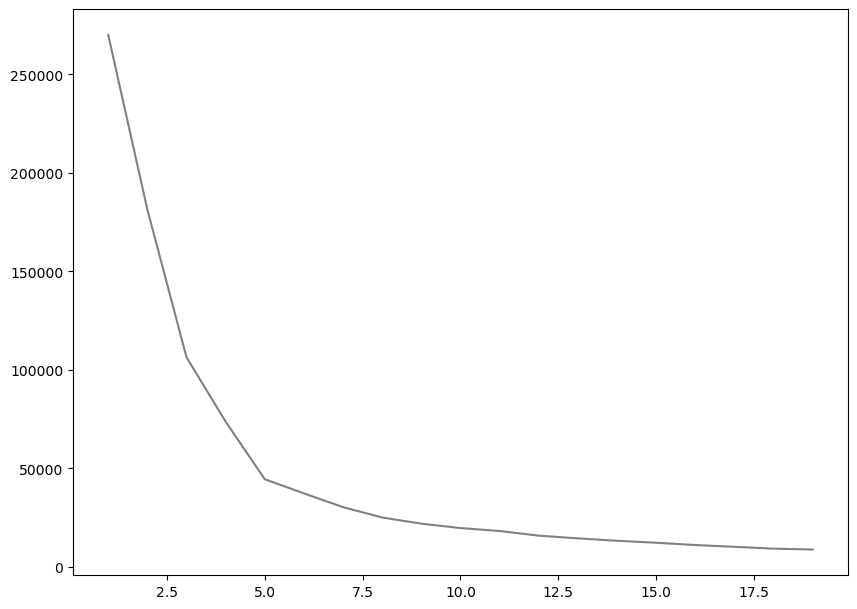

In [49]:
sns.lineplot(range(1,20), elbow, color = 'grey')

no of clusters is 5

In [62]:
model = KMeans(n_clusters = 5, init= 'k-means++', random_state = 101)
model.fit(X2)

KMeans(n_clusters=5, random_state=101)

In [63]:
y2_pred = model.fit_predict(X2)

In [64]:
another_df = df.copy()
another_df['clusters'] = y_pred
another_df

,CustomerID,Genre,Age,Annual_income,Spending_Score,clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,2
197,198,Male,32,126,74,4
198,199,Male,32,137,18,3


In [65]:
another_df['clusters'].unique()

array([0, 4, 3, 2, 1])

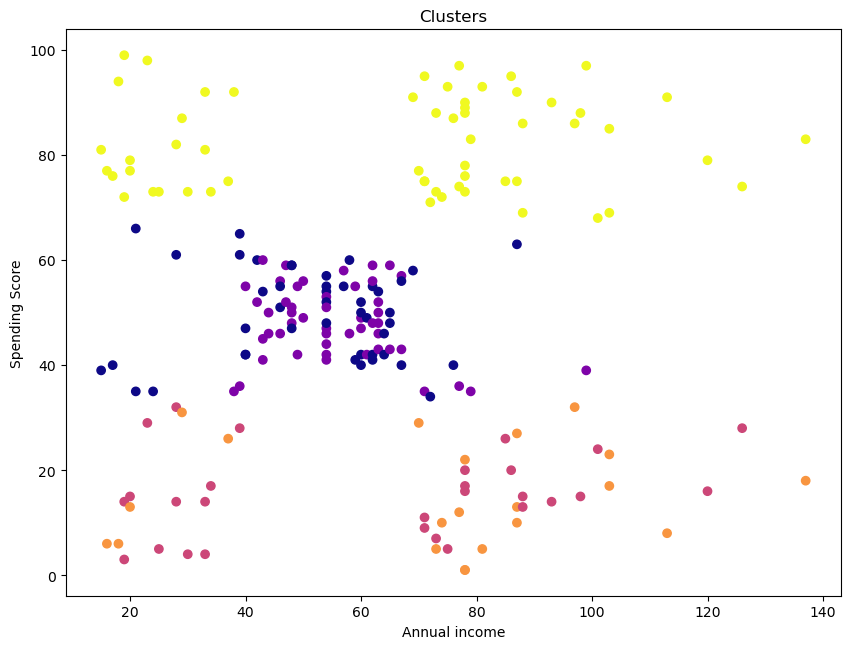

In [66]:
plt.scatter(another_df['Annual_income'], another_df['Spending_Score'], c= another_df['clusters'], cmap = 'plasma')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.title('Clusters')
plt.show()